In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(''), '..')))

import weighted_imputation as wi
import matplotlib.pyplot as plt
import networkx as nx
import pprint as pp
from weighted_imputation.structures import Graph, Tree

In [2]:
cliques_0 = [{'d','g'},{'d','h'},{'b','d','e'},{'e','i'},{'a','b','c'},{'b','c','e'},{'c','f'},{'i','z'}]
graph_0 = Graph({'a','b','c','d','e','f','g','h','i','z'})

cliques_1 = [{'d','g'},{'d','h'},{'b','d','e'},{'e','i'},{'a','b','c'},{'b','c','e'},{'c','f'},{'i','z'},
             {'c', 'z'}, {'g', 'z'}, {'x', 'z'}, {'y', 'z'}]
graph_1 = Graph({'a','b','c','d','e','f','g','h','i','x','y','z'})

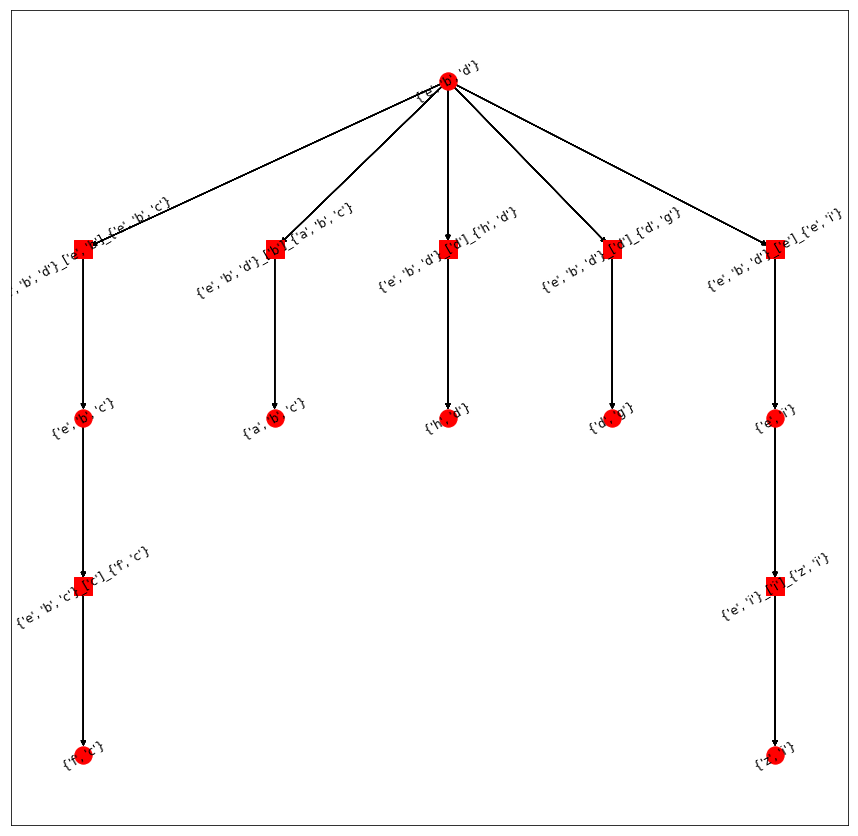

Root:  {'e', 'b', 'd'}
Root's children OrderedSet([{'e', 'b', 'd'}_['e', 'b']_{'e', 'b', 'c'}, {'e', 'b', 'd'}_['b']_{'a', 'b', 'c'}, {'e', 'b', 'd'}_['d']_{'h', 'd'}, {'e', 'b', 'd'}_['d']_{'d', 'g'}, {'e', 'b', 'd'}_['e']_{'e', 'i'}])
Children of  {'e', 'b', 'd'}_['e', 'b']_{'e', 'b', 'c'} node  OrderedSet([{'e', 'b', 'c'}])
Children of  {'e', 'b', 'd'}_['b']_{'a', 'b', 'c'} node  OrderedSet([{'a', 'b', 'c'}])
Children of  {'e', 'b', 'd'}_['d']_{'h', 'd'} node  OrderedSet([{'h', 'd'}])
Children of  {'e', 'b', 'd'}_['d']_{'d', 'g'} node  OrderedSet([{'d', 'g'}])
Children of  {'e', 'b', 'd'}_['e']_{'e', 'i'} node  OrderedSet([{'e', 'i'}])
Directed graph nodes:  ["{'e', 'b', 'd'}", "{'e', 'b', 'd'}_['e', 'b']_{'e', 'b', 'c'}", "{'e', 'b', 'c'}", "{'e', 'b', 'c'}_['c']_{'f', 'c'}", "{'f', 'c'}", "{'e', 'b', 'd'}_['b']_{'a', 'b', 'c'}", "{'a', 'b', 'c'}", "{'e', 'b', 'd'}_['d']_{'h', 'd'}", "{'h', 'd'}", "{'e', 'b', 'd'}_['d']_{'d', 'g'}", "{'d', 'g'}", "{'e', 'b', 'd'}_['e']_{'e', 'i'}",

In [3]:
tree_0 = wi.build_junction_tree(graph_0, cliques_0)
tree_0.plot()
root = tree_0.get_root()
print("Root: ", root)
print("Root's children", root.get_children())
for child in root.get_children():
    print("Children of ", child, "node ", child.get_children())

graph_from_tree_0 = tree_0.to_directed_graph()
print("Directed graph nodes: ", graph_from_tree_0.get_nodes())
print("Is tree?", nx.is_tree(graph_from_tree_0.to_networkx()))

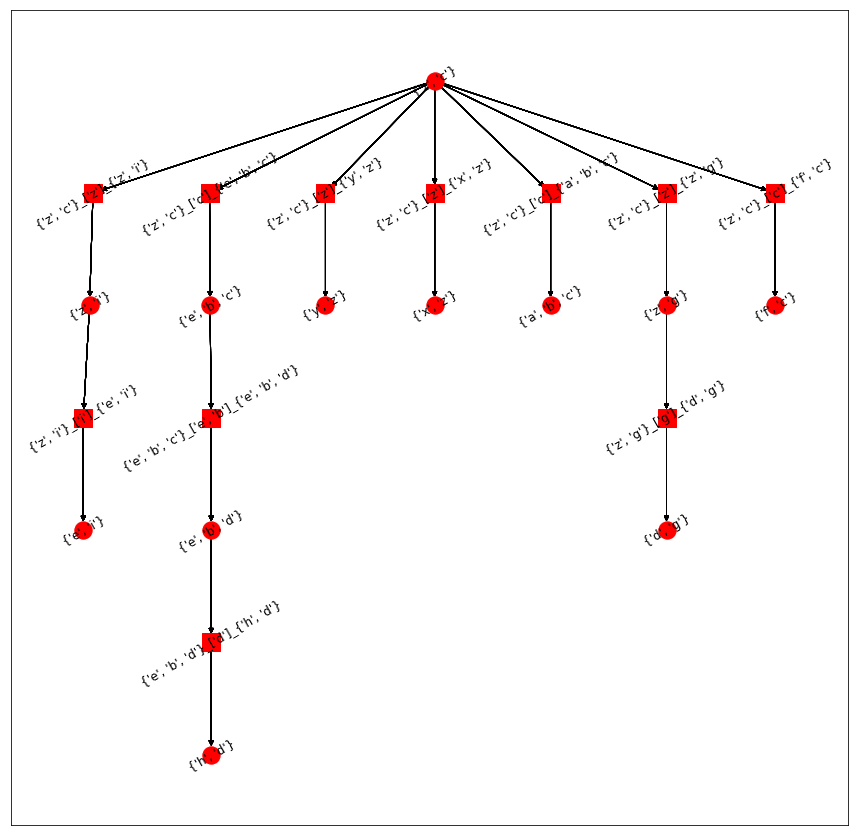

Is tree? True


In [4]:
tree_1 = wi.build_junction_tree(graph_1, cliques_1)
tree_1.plot()
graph_from_tree_1 = tree_1.to_directed_graph()
print("Is tree?", nx.is_tree(graph_from_tree_1.to_networkx()))

In [5]:
graphs = [
    wi.DirectedGraph.from_string("[1][8][2|1:8][5|1][6|5][3|2][4|2][7|3:4:6]"),
    wi.DirectedGraph.from_string("[A][C][F][B|A][D|A:C][E|B:F]"),
    wi.DirectedGraph.from_string("[A][S][T|A][L|S][B|S][D|B:E][E|T:L][X|E]"),
    wi.DirectedGraph.from_string("[A][B][C][H][D|A:H][F|B:C][E|B:D][G|A:D:E:F]"),
    wi.DirectedGraph.from_string("[HIST|LVF][CVP|LVV][PCWP|LVV][HYP][LVV|HYP:LVF][LVF]" +
                                "[STKV|HYP:LVF][ERLO][HRBP|ERLO:HR][HREK|ERCA:HR][ERCA][HRSA|ERCA:HR][ANES]" +
                                "[APL][TPR|APL][ECO2|ACO2:VLNG][KINK][MINV|INT:VLNG][FIO2][PVS|FIO2:VALV]" +
                                "[SAO2|PVS:SHNT][PAP|PMB][PMB][SHNT|INT:PMB][INT][PRSS|INT:KINK:VTUB][DISC]" +
                                "[MVS][VMCH|MVS][VTUB|DISC:VMCH][VLNG|INT:KINK:VTUB][VALV|INT:VLNG]" +
                                "[ACO2|VALV][CCHL|ACO2:ANES:SAO2:TPR][HR|CCHL][CO|HR:STKV][BP|CO:TPR]"),
    wi.DirectedGraph.from_string("[Age][Mileage][SocioEcon|Age][GoodStudent|Age:SocioEcon]" + 
                              "[RiskAversion|Age:SocioEcon][OtherCar|SocioEcon]" +
                              "[VehicleYear|SocioEcon:RiskAversion][MakeModel|SocioEcon:RiskAversion]" + 
                              "[SeniorTrain|Age:RiskAversion][HomeBase|SocioEcon:RiskAversion]" +
                              "[AntiTheft|SocioEcon:RiskAversion][RuggedAuto|VehicleYear:MakeModel]" +
                              "[Antilock|VehicleYear:MakeModel][DrivingSkill|Age:SeniorTrain]" +
                              "[CarValue|VehicleYear:MakeModel:Mileage][Airbag|VehicleYear:MakeModel]" +
                              "[DrivQuality|RiskAversion:DrivingSkill][Theft|CarValue:HomeBase:AntiTheft]" +
                              "[Cushioning|RuggedAuto:Airbag][DrivHist|RiskAversion:DrivingSkill]" +
                              "[Accident|DrivQuality:Mileage:Antilock][ThisCarDam|RuggedAuto:Accident]" +
                              "[OtherCarCost|RuggedAuto:Accident][MedCost|Age:Accident:Cushioning]" +
                              "[ILiCost|Accident][ThisCarCost|ThisCarDam:Theft:CarValue]" +
                              "[PropCost|ThisCarCost:OtherCarCost]"),
    wi.DirectedGraph.from_string("[N07muVerMo][SubjVertMo][QGVertMotion][SatContMoist][RaoContMoist]" +
                      "[VISCloudCov][IRCloudCover][AMInstabMt][WndHodograph][MorningBound][LoLevMoistAd][Date]" +
                      "[MorningCIN][LIfr12ZDENSd][AMDewptCalPl][LatestCIN][LLIW]" +
                      "[CombVerMo|N07muVerMo:SubjVertMo:QGVertMotion][CombMoisture|SatContMoist:RaoContMoist]" +
                      "[CombClouds|VISCloudCov:IRCloudCover][Scenario|Date][CurPropConv|LatestCIN:LLIW]" +
                      "[AreaMesoALS|CombVerMo][ScenRelAMCIN|Scenario][ScenRelAMIns|Scenario][ScenRel34|Scenario]" +
                      "[ScnRelPlFcst|Scenario][Dewpoints|Scenario][LowLLapse|Scenario][MeanRH|Scenario]" +
                      "[MidLLapse|Scenario][MvmtFeatures|Scenario][RHRatio|Scenario][SfcWndShfDis|Scenario]" +
                      "[SynForcng|Scenario][TempDis|Scenario][WindAloft|Scenario][WindFieldMt|Scenario]" +
                      "[WindFieldPln|Scenario][AreaMoDryAir|AreaMesoALS:CombMoisture]" +
                      "[AMCINInScen|ScenRelAMCIN:MorningCIN][AMInsWliScen|ScenRelAMIns:LIfr12ZDENSd:AMDewptCalPl]" +
                      "[CldShadeOth|AreaMesoALS:AreaMoDryAir:CombClouds][InsInMt|CldShadeOth:AMInstabMt]" +
                      "[OutflowFrMt|InsInMt:WndHodograph][CldShadeConv|InsInMt:WndHodograph][MountainFcst|InsInMt]" +
                      "[Boundaries|WndHodograph:OutflowFrMt:MorningBound][N34StarFcst|ScenRel34:PlainsFcst]" +
                      "[CompPlFcst|AreaMesoALS:CldShadeOth:Boundaries:CldShadeConv][CapChange|CompPlFcst]" +
                      "[InsChange|CompPlFcst:LoLevMoistAd][CapInScen|CapChange:AMCINInScen]" +
                      "[InsSclInScen|InsChange:AMInsWliScen][R5Fcst|MountainFcst:N34StarFcst]" +
                      "[PlainsFcst|CapInScen:InsSclInScen:CurPropConv:ScnRelPlFcst]")
    ]

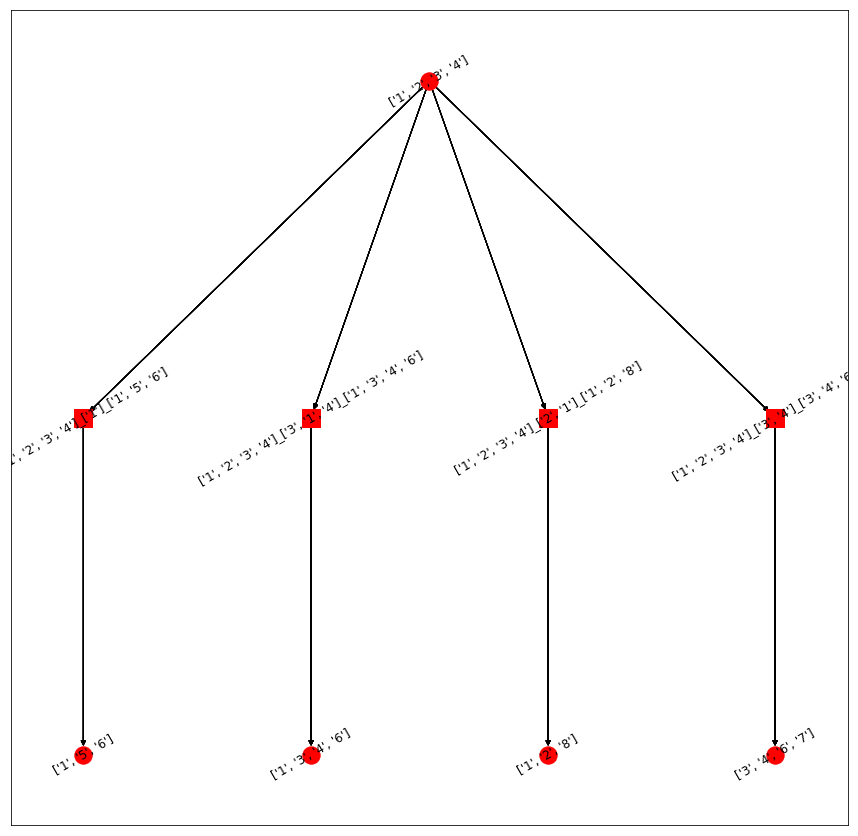

Is tree? True


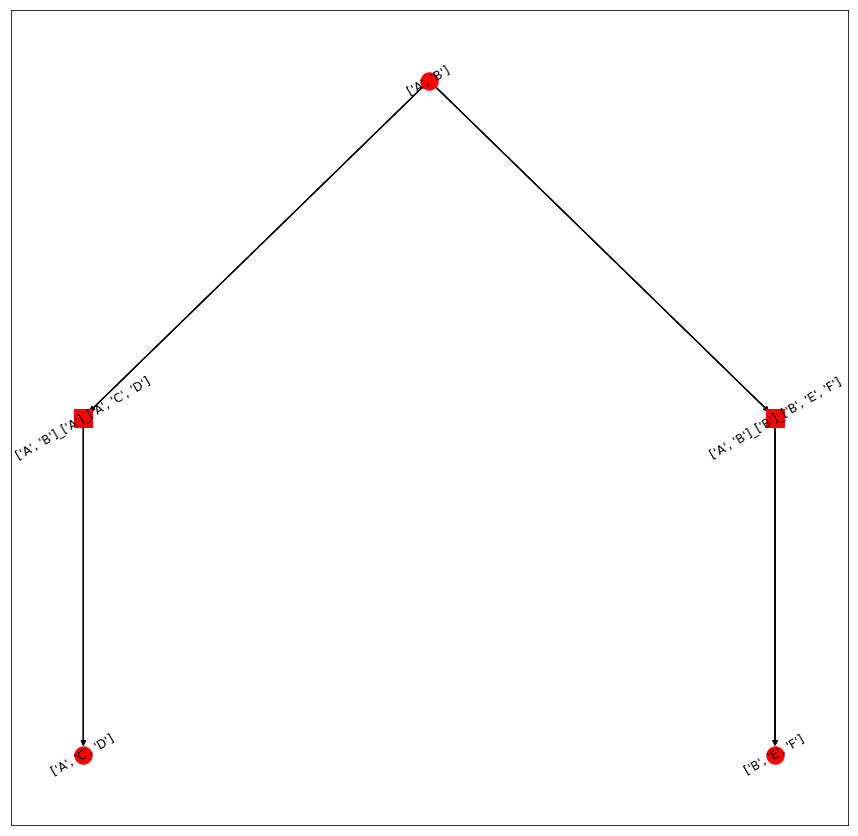

Is tree? True


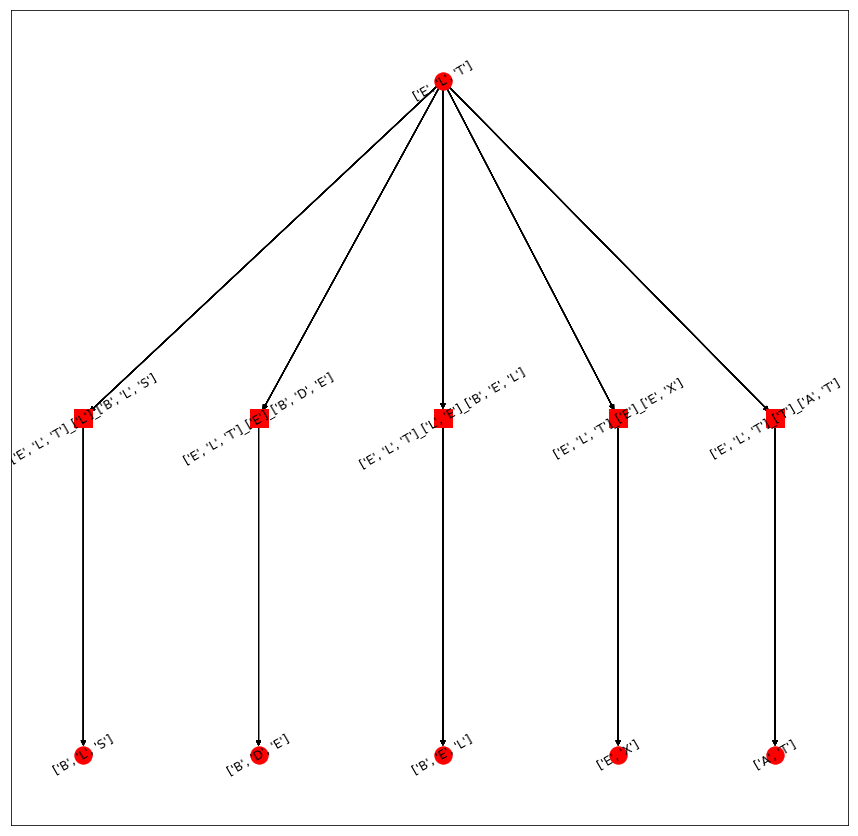

Is tree? True


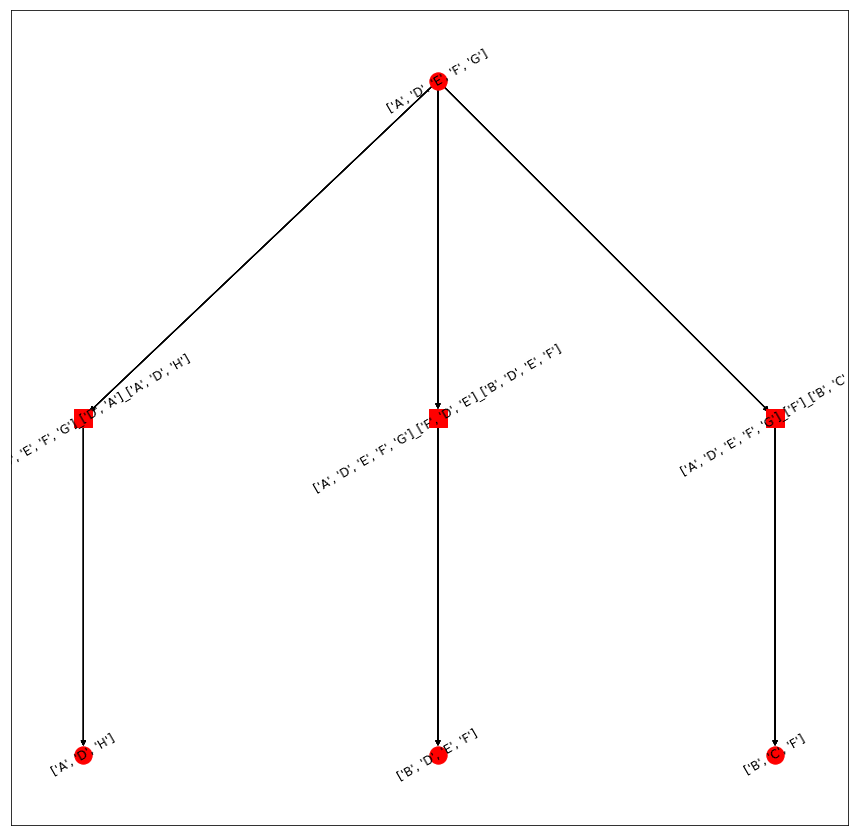

Is tree? True


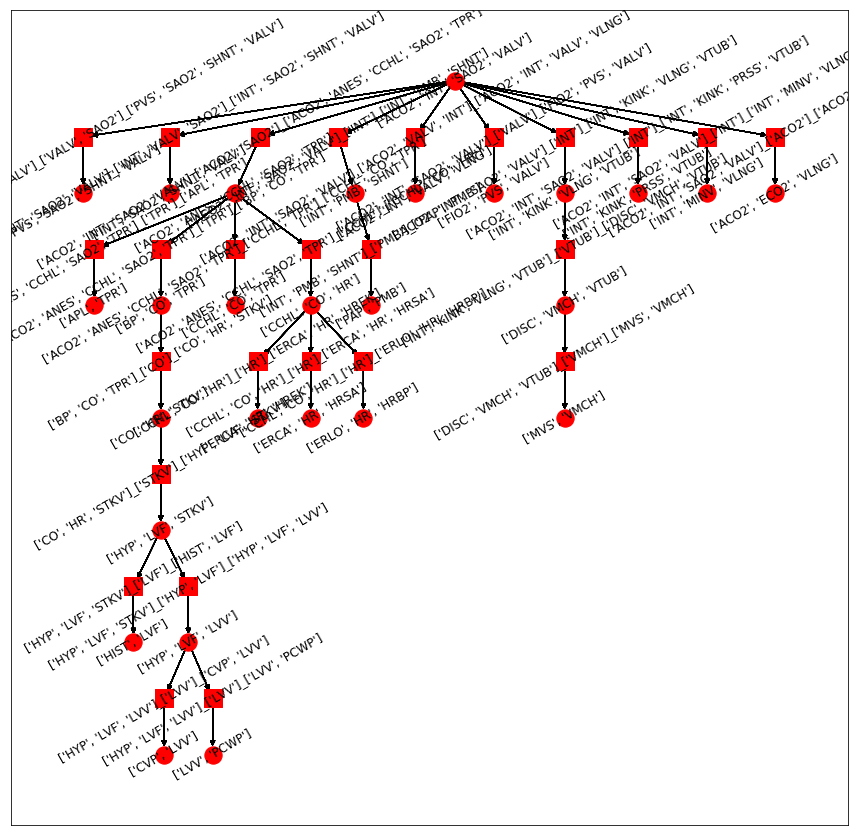

Is tree? True


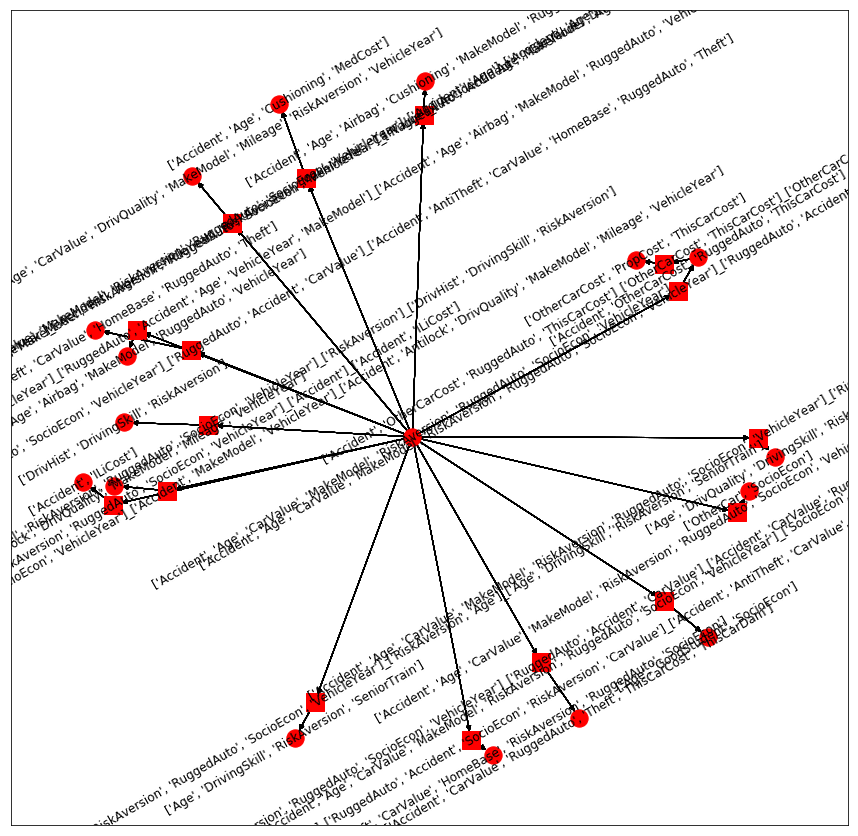

Is tree? True


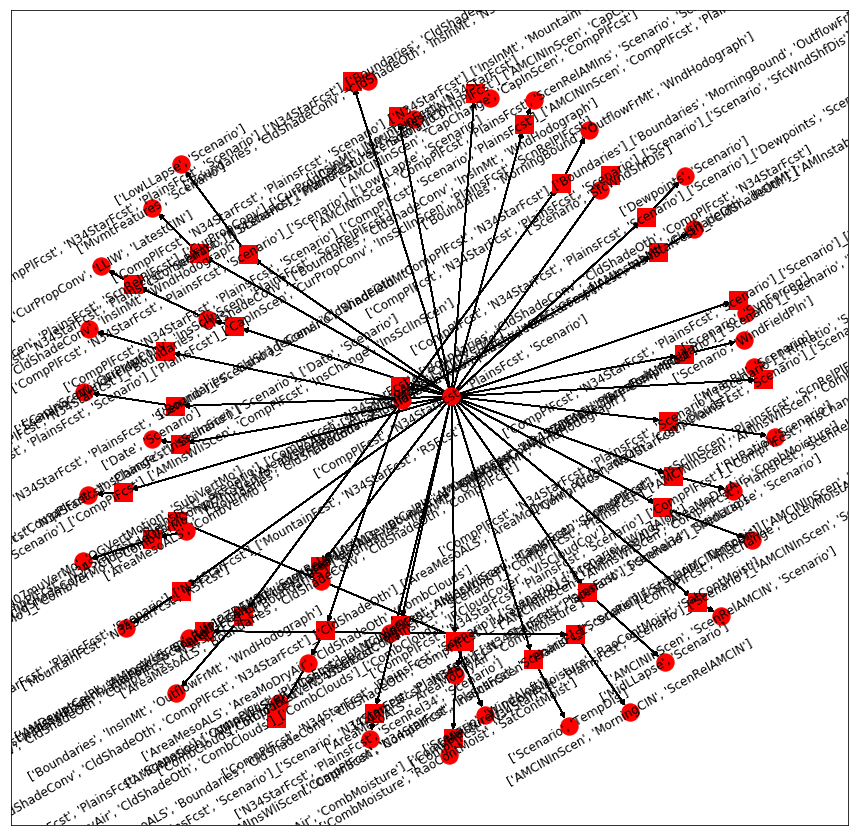

Is tree? True


In [6]:
for graph in graphs:
    moralized_graph = wi.moralize(graph)
    triangulated_graph = wi.triangulate(moralized_graph)
    cliques = wi.maximal_cliques(triangulated_graph)

    junction_tree = wi.build_junction_tree(graph, cliques)
    junction_tree.plot()
    graph_from_tree = junction_tree.to_directed_graph()
    print("Is tree?", nx.is_tree(graph_from_tree.to_networkx()))